In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from scipy.ndimage import convolve, correlate, filters
from scipy import misc,ndimage


# Necessario per mostrare le figure nei notebooks
%matplotlib inline


img_src = './data/'

In [2]:
def img_show(image,**argv):
    plt.figure(figsize=(10,10))
    plt.imshow(image,**argv) # display the image
    plt.axis('off') 
    plt.show()


def img_info(image):
    print(image.shape, image.dtype, type(image)) 
    
    
def get_contrast(img):
    return np.max(img*255) - np.min(img*255)

def base_stats(img):
    return "Contrasto: {0:.0f} (valore massimo: {1:.0f}; valore minimo: {2:.0f})".format(get_contrast(img),np.max(img*255),np.min(img*255))

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def normalize(img):
    return (img-np.min(img))/(np.max(img)-np.min(img))

## Sobel Filters

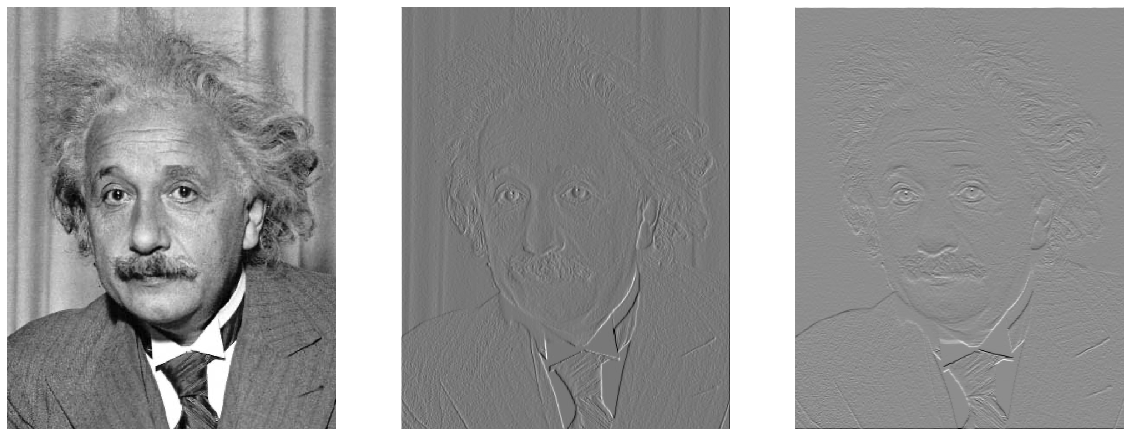

In [3]:
image = mp_image.imread(os.path.join(img_src,'einstein2.png'))
image = image[:,:,0]


sobelH = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

sobelV = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 3, 1) 
plt.imshow(image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.imshow(convolve(image,sobelH,mode='constant', cval=0.0)
           ,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(convolve(image,sobelV,mode='constant', cval=0.0)
           ,cmap=cm.gray)
plt.axis('off')



plt.show()

## Laplaciano

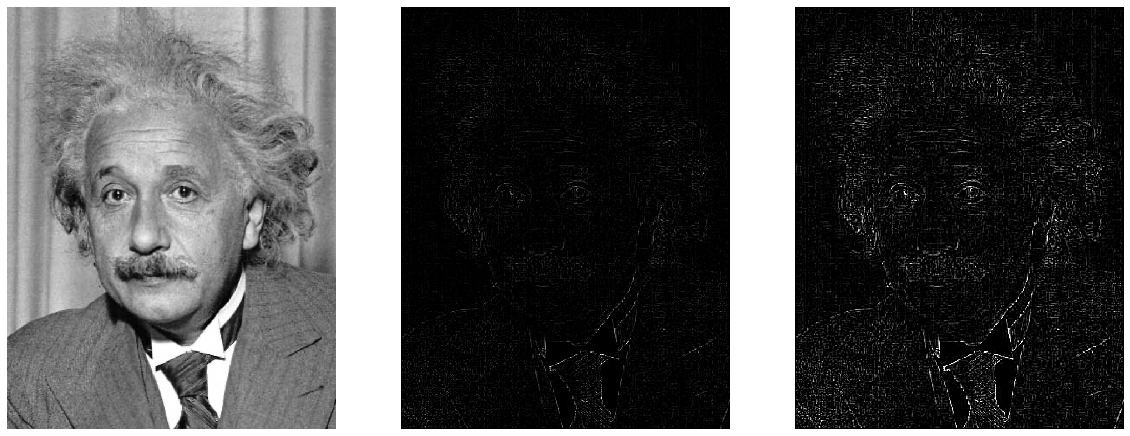

In [4]:


laplace = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])


iso_laplace = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1]
])


fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1) 
plt.imshow(image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.imshow(np.clip(convolve(image,laplace,mode='constant', cval=0.0),0,1)
           ,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(np.clip(convolve(image,iso_laplace,mode='constant', cval=0.0),0,1)
           ,cmap=cm.gray)
plt.axis('off')



plt.show()

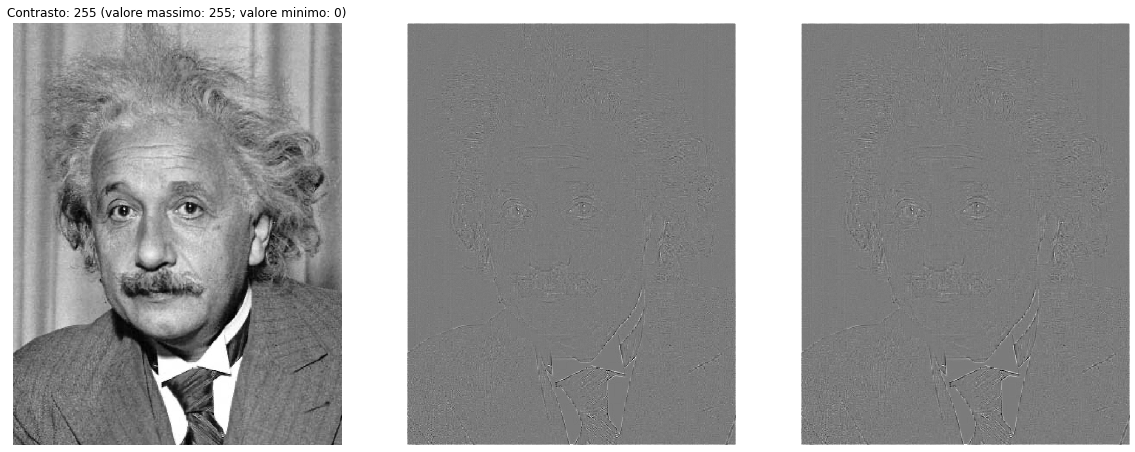

In [5]:

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.imshow(convolve(image,-laplace,mode='constant', cval=0.0)
           ,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(convolve(image,-iso_laplace,mode='constant', cval=0.0)
           ,cmap=cm.gray)
plt.axis('off')



plt.show()

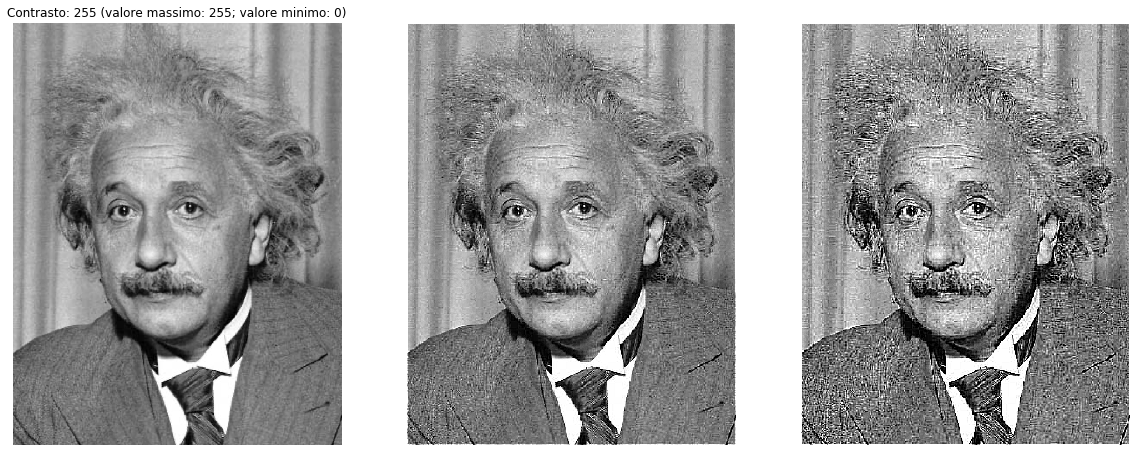

In [6]:

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.imshow(np.clip(image - convolve(image,laplace,mode='constant', cval=0.0),0,1)
           ,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(np.clip(image - convolve(image,iso_laplace,mode='constant', cval=0.0),0,1)
           ,cmap=cm.gray)
plt.axis('off')



plt.show()

# Ampiezza

In [7]:
image = rgb2gray(mp_image.imread(os.path.join(img_src,'lenna.jpg')))

G_x = filters.sobel(image,0)
G_y = filters.sobel(image,1)

M = np.sqrt(G_x**2 + G_y**2)


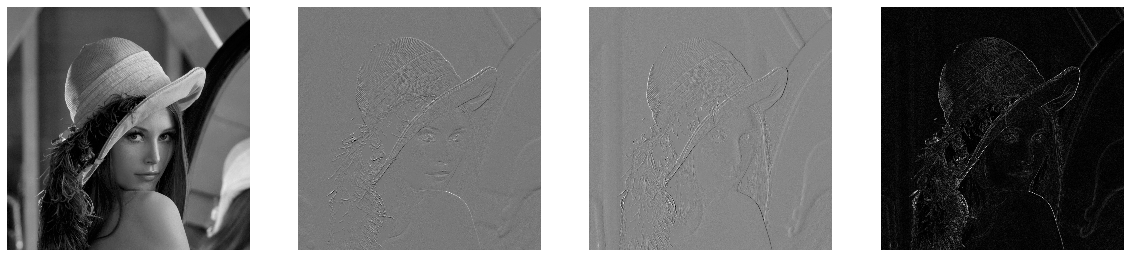

In [8]:
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 4, 1) 
plt.imshow(image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 2) 
plt.imshow(G_x,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 3) 
plt.imshow(G_y,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 4) 
plt.imshow(M,cmap=cm.gray)
plt.axis('off')

plt.show()

## Derivate e filtri gaussiani

In [9]:
sigma = 3

dog_image = filters.sobel(image)
l_image = filters.laplace(image)
log_image = filters.gaussian_laplace(image,sigma)



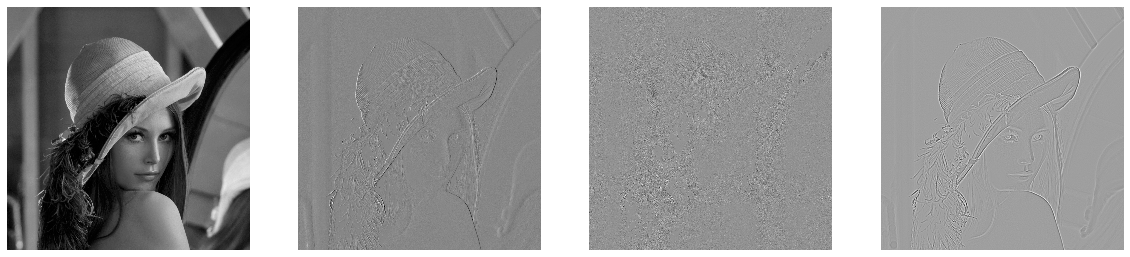

In [10]:
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 4, 1) 
plt.imshow(image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 2) 
plt.imshow(dog_image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 3) 
plt.imshow(l_image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 4) 
plt.imshow(log_image,cmap=cm.gray)
plt.axis('off')

plt.show()

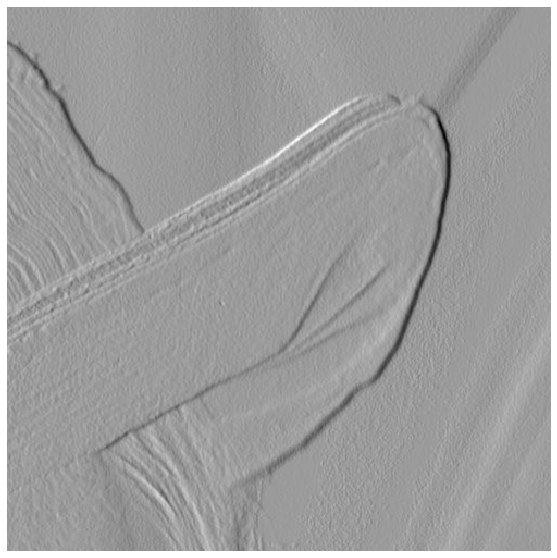

In [11]:
img_show(dog_image[400:900,1200:1700],cmap=cm.gray)

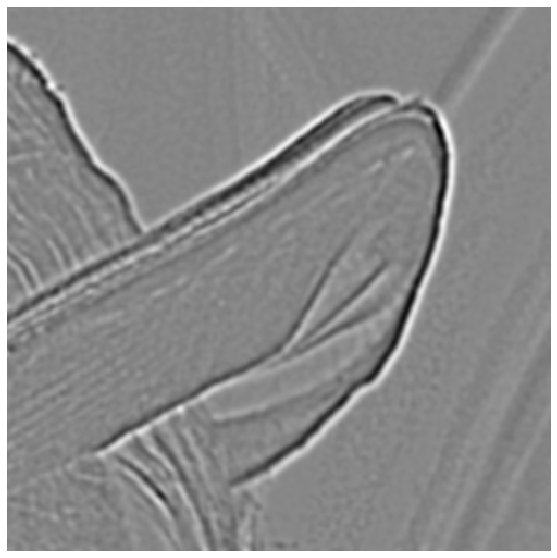

In [12]:
img_show(log_image[400:900,1200:1700],cmap=cm.gray)

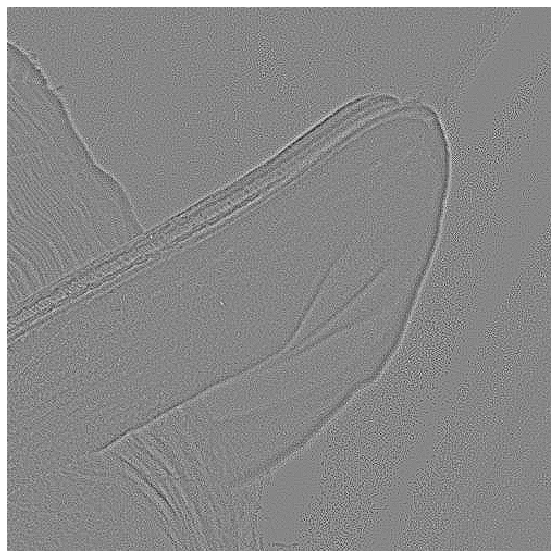

In [13]:
img_show(l_image[400:900,1200:1700],cmap=cm.gray)